# Method for $d=2$ (Algorithm 1)

This notebook contains a complete working example of Algorithm 1 from the paper 

<i>Sampling triangulations of manifolds using Monte Carlo methods</i>, by <a href="https://www.maths.usyd.edu.au/u/ega/">Eduardo Altmann</a> and <a href="https://sites.google.com/view/jonathan-spreer/">Jonathan Spreer</a>, <a href="https://arxiv.org/abs/2310.07372"> arXiv:2310.07372 </a>.


In [1]:
# Imports
import time, math, random, sys

# import all functions etc. from regina
from regina import *

# Functions to perform MCMC in d=2
sys.path.append("./src/")
from functions2d import *

### Initialization

In [2]:
# choose the genus of the orientable surface to sample triangulations from
genus = 1

#choose the paramter gamma of the MCMC method
gamma = 1/5

# we start at the minimal triangulation of surface 's', with signature 'iso' (state of the mcmc)
s = surface(genus,max(2,4*genus-2))
iso = s.isoSig_RidgeDegrees()

### Simple iterations

Inital triangulation:

In [3]:
iso

'cPbbde'

Triangulation after one iteration

In [4]:
iterate(iso,gamma)

'cPbbde'

Triangulation after 10 iterations

In [5]:
iterate(iso,gamma,steps=10)

'evQcddbfc'

Properties of the (new) triangulation

In [6]:
isoNew = iterate(iso,gamma,steps=10)
sNew=Triangulation2.fromIsoSig(isoNew) # Regina triangulation
fNew = sNew.fVector()
print(sNew.detail())

Size of the skeleton:
  Triangles: 6
  Edges: 9
  Vertices: 3

Triangle gluing:
  Triangle  |  glued to:     (01)     (02)     (12)
  ----------+--------------------------------------
         0  |              3 (01)   2 (02)   1 (12)
         1  |              5 (01)   4 (02)   0 (12)
         2  |              3 (02)   0 (02)   4 (12)
         3  |              0 (01)   2 (01)   5 (20)
         4  |              5 (21)   1 (02)   2 (12)
         5  |              1 (01)   3 (21)   4 (10)

Vertices:
  Triangle  |  vertex:    0   1   2
  ----------+----------------------
         0  |             0   1   2
         1  |             1   1   2
         2  |             0   1   2
         3  |             0   1   1
         4  |             1   1   2
         5  |             1   1   1

Edges:
  Triangle  |  edge:   01  02  12
  ----------+--------------------
         0  |           0   1   2
         1  |           3   4   2
         2  |           5   1   6
         3  |           0  

### MCMC convergence

Here we compute and plot how the size of the triangulation evolves with the number of iterations

In [7]:
ns=[]
isoNew=iso
for t in range(600):
    isoNew=iterate(isoNew,gamma)
    sNew=Triangulation2.fromIsoSig(isoNew) # Regina triangulation
    fNew = sNew.fVector()
    ns.append(fNew[2])

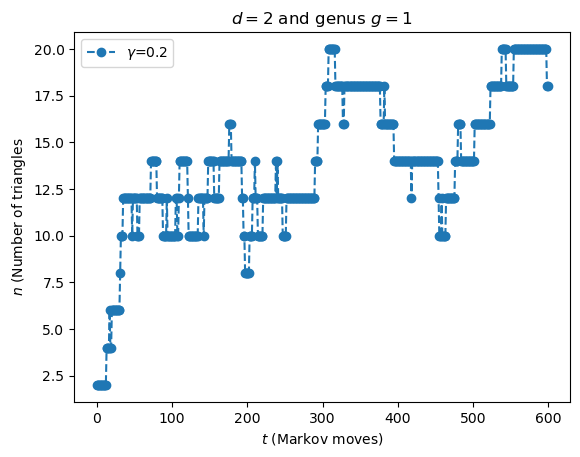

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(len(ns)),ns,"--o",label=r"$\gamma$="+str(gamma))
plt.title(r"$d=2$ and genus $g=$"+str(genus))
plt.xlabel(r"$t$ (Markov moves)")
plt.ylabel(r"$n$ (Number of triangles")
plt.legend()
plt.show()

### Sampling data

These functions allow for a more efficient sampling of triangulations

In [9]:
mcmc2d(iso,gamma)

collecting triangulation 1  of  10  : owLvLvAQadiklmnncccedbfc
collecting triangulation 2  of  10  : swvzvALwAPafkjkmporrcdabbfedcb
collecting triangulation 3  of  10  : sLwwwwvLPPbcegioqprrabadacdcec
collecting triangulation 4  of  10  : oLLwLvMPbdehklnnaaccdcee
collecting triangulation 5  of  10  : qwLLzwLvQadfhimpopffffadecd
collecting triangulation 6  of  10  : qwvLLAzzMagjhjlnopccafdcbdb
collecting triangulation 7  of  10  : mwvLvMQaekikjlcfddbfb
collecting triangulation 8  of  10  : owwLzLvQacghjmnncdadcaef
collecting triangulation 9  of  10  : wwwvvLvPzPAMackmlrstqtuvfedfcdadcdef
collecting triangulation 10  of  10  : AwvLvLvLvMLMQMagjoqsxruuyywzccdabfacbbccbb


True

We can choose the number of samples, the interval between collecting samples, and the offset starting from which they're collected:

In [10]:
ttt = time.time()
mcmc2d(iso,gamma,samples=5,interval=200,offset=1000)
print("time spent:",time.time()-ttt)

collecting triangulation 1  of  5  : wwLLzvvPvzQPadghpportuuvccaaaaffbdac
collecting triangulation 2  of  5  : swLwvLLAvQadekkmmprrccacbaacff
collecting triangulation 3  of  5  : ywLLwvzLzLzMPadggloossvvxxccaadacdfeabb
collecting triangulation 4  of  5  : uwvvLLLQzzPajmoknoprttcaaaccaeeaa
collecting triangulation 5  of  5  : ywvzLLvwzLAPPaehjnoqtrwuwxfeeceffcbafff
time spent: 1.0348901748657227


For longer simulations, it is best to save the sampled triangulations to a file (in the folder "output"), which can later be studied.

In [11]:
ttt = time.time()
mcmc2d(iso,gamma,samples=100,offset=1000,verbose=False,printToFile="genus_"+str(genus))
print("time spent:",time.time()-ttt)

time spent: 5.262592315673828


In [12]:
!ls outputs/mcmc2d*

outputs/mcmc2d_genus_1_gamma_0.2_samples_100.txt
